In [39]:
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from common import Fonts, Images, NWSL, Colors, add_signature, add_source

In [40]:
df = pd.read_csv("final.csv")
df

,team,season,points
0,BOS,2013,"[1, 4, 7, 8, 8, 8, 11, 11, 12, 15, 18, 21, 22,..."
1,CHI,2013,"[1, 1, 1, 4, 4, 5, 8, 9, 12, 15, 16, 16, 17, 1..."
2,GFC,2013,"[3, 4, 7, 10, 10, 11, 12, 15, 16, 16, 19, 22, ..."
3,KC,2013,"[1, 4, 7, 7, 7, 10, 13, 14, 17, 20, 20, 23, 23..."
4,POR,2013,"[3, 3, 6, 6, 9, 12, 12, 13, 14, 17, 17, 18, 21..."
...,...,...,...
107,POR,2024,"[0, 1, 4, 7, 10, 13, 13, 16, 16, 16, 16, 19, 2..."
108,RGN,2024,"[3, 3, 6, 7, 7, 8, 9, 10, 13, 13, 13, 13, 16, ..."
109,SD,2024,"[0, 3, 6, 9, 10, 11, 11, 11, 12, 12, 15, 15, 1..."
110,UTA,2024,"[0, 3, 3, 4, 4, 4, 4, 5, 8, 8, 11, 14, 14, 14,..."


In [41]:
df["season"].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022, 2023, 2024])

<Figure size 4000x3200 with 0 Axes>

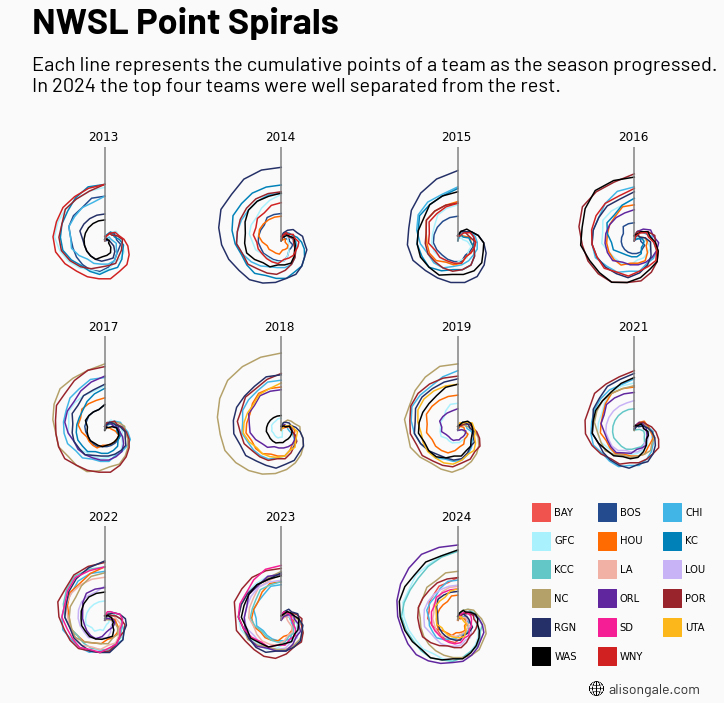

In [48]:
# Setup
plt.rcParams["figure.figsize"] = (10, 8)
plt.figure(dpi=400)
cols = 4
rows = 3
fig, axs = plt.subplots(rows, cols)
fig.patch.set_facecolor(Colors.WHITE)
fig.tight_layout()


def plot_season(ax, season):
    ax.set_facecolor(Colors.WHITE)
    ax.set_aspect("equal", "datalim")

    # Plot data
    data = df[df["season"] == season]
    for team in data["team"].unique():
        points = list(
            map(int, data[data["team"] == team]["points"].iloc[0][1:-1].split(", "))
        )
        x = []
        y = []
        for i in range(0, len(points)):
            r = points[i] / (3 * len(points))
            theta = (1 * math.pi / 2) - i / (len(points) - 1) * (math.pi * 2)
            x.append(r * math.cos(theta))
            y.append(r * math.sin(theta))
        ax.plot(x, y, color=NWSL.color(team))

    ax.plot([0, 0], [0, 1], color=Colors.GRAY)

    # Axes
    ax.set_xlim([-0.8, 0.5])
    ax.set_ylim([-0.7, 1])
    ax.axis("off")

    # Title
    ax.set_title(season, x=0.58)


seasons = df["season"].unique()
for i in range(0, len(seasons)):
    plot_season(axs[math.floor(i / cols), i % cols], seasons[i])

# Legend
teams = sorted(df["team"].unique())
legend_cols = 3
for i in range(0, len(teams)):
    axs[rows - 1, 3].text(
        (i % legend_cols) * 0.75, math.floor(i / legend_cols), teams[i], va="center"
    )

    axs[rows - 1, 3].scatter(
        [(i % legend_cols) * 0.75 - 0.15],
        [math.floor(i / legend_cols)],
        color=NWSL.color(teams[i]),
        s=300,
        clip_on=False,
        marker="s",
    )
axs[rows - 1, cols - 1].invert_yaxis()
axs[rows - 1, cols - 1].set_ylim([6, 0.5])
axs[rows - 1, cols - 1].set_xlim([-0.2, 1.7])
axs[rows - 1, cols - 1].axis("off")

plt.subplots_adjust(wspace=0, hspace=0.1)
fig.tight_layout()

# Title
plt.figtext(
    0.05,
    1.15,
    "NWSL Point Spirals",
    fontproperties=Fonts.BARLOW_BOLD,
    size=36,
    ha="left",
)

# Subtitle
plt.figtext(
    0.05,
    1.05,
    "Each line represents the cumulative points of a team as the season progressed.\nIn 2024 the top four teams were well separated from the rest.",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
)

add_signature(fig, x=0.82, y=0, fs=14, w=0.025)

# Save image
plt.savefig(
    "point_spiral_" + str(max(df["season"].unique())) + ".png",
    bbox_inches="tight",
    pad_inches=0.5,
    dpi=400,
)